In [1]:
import pandas as pd

/var/folders/gt/sg3v8rd13l52jx91mfbgzbfc0000gn/T/ipykernel_9294/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.DataFrame(columns=['peak memory (GB)', 'prove time (s)', 'verify time (s)'])

In [3]:
df.loc['Ligetron'] = [10,50000,22000] # r7i.4xlarge (8 cores)
df.loc['zkLLM'] = [15.5, 531+620, 2.36] # NVIDIA A100SMX4 GPU
df.loc['opp/ai'] = [2.668256,2.02*32,0.24] # m3 max, circom, snarkjs, sequentially
df

,peak memory (GB),prove time (s),verify time (s)
Ligetron,10.000000,50000.00,22000.00
zkLLM,15.500000,1151.00,2.36
opp/ai,2.668256,64.64,0.24


In [4]:
import matplotlib.pyplot as plt

onyx = (34/255, 34/255, 34/255)
sky = (0/255, 246/255, 255/255)

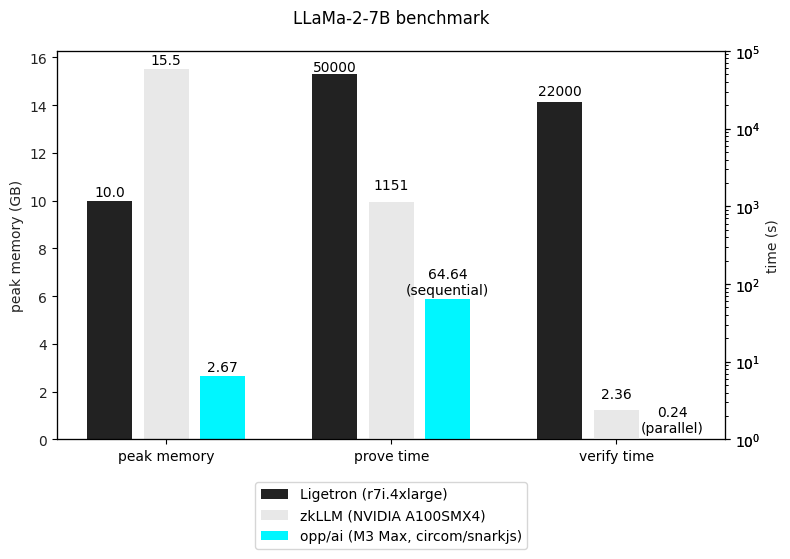

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4.5))

onyx = (34/255, 34/255, 34/255)
sky = (0/255, 246/255, 255/255)
mist = (232/255, 232/255, 232/255)
ax1.set_ylabel('peak memory (GB)', color=onyx)
ax1.bar([-5, -4, -3], df['peak memory (GB)'], color=[onyx, mist, sky])
ax1.tick_params(axis='y', labelcolor=onyx)

# add labels to the bar
mem = df['peak memory (GB)'].tolist()
ax1.text(-5, mem[0]+0.2, f"{mem[0]}", color='black', ha='center')
ax1.text(-4, mem[1]+0.2, f"{mem[1]}", color='black', ha='center')
ax1.text(-3, mem[2]+0.2, f"{mem[2]:.2f}", color='black', ha='center')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('time (s)', color=onyx)  # we already handled the x-label with ax1
ax2.bar([-1, 0, 1], df['prove time (s)'], color=[onyx, mist, sky])

# add labels to the bar
time = df['prove time (s)'].tolist()
ax2.text(-1, time[0]+5000, f"{time[0]:.0f}", color='black', ha='center')
ax2.text(0, time[1]+500, f"{time[1]:.0f}", color='black', ha='center')
ax2.text(1, time[2]+10, f"{time[2]:.2f}\n(sequential)", color='black', ha='center')

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.bar([3, 4, 5], df['verify time (s)'], color=[onyx, mist, sky])

# add labels to the bar
time = df['verify time (s)'].tolist()
ax3.text(3, time[0]+5000, f"{time[0]:.0f}", color='black', ha='center')
ax3.text(4, time[1]+1, f"{time[1]:.2f}", color='black', ha='center')
ax3.text(5, time[2]+1, f"{time[2]:.2f}\n(parallel)", color='black', ha='center')

# Set the y-axis of ax2 and ax3 to a logarithmic scale
ax2.set_yscale('log')
ax3.set_yscale('log')

# Set the same y-limits for ax2 and ax3
ax2.set_ylim(1, 100000)
ax3.set_ylim(ax2.get_ylim())

ax2.xaxis.set_ticks([-4,0,4])
ax2.xaxis.set_ticklabels(["peak memory", "prove time", "verify time"])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

proxy_bars = [plt.Rectangle((0,0),1,1, fc=color) for color in [onyx, mist, sky]]

plt.legend(proxy_bars, ['Ligetron (r7i.4xlarge)', 'zkLLM (NVIDIA A100SMX4)', 'opp/ai (M3 Max, circom/snarkjs)'],loc='lower center', bbox_to_anchor=(0.5,-0.3))

plt.title('LLaMa-2-7B benchmark', y=1.05)
plt.show()